# Section 0. Environment Set Up

### KNN and Linear Regression

In [ ]:
# We use Pytorch to check.
# Notice that Colab now supports native Pytorch. You do not need to install Pytorch on your own.
import torch

In [ ]:
# Check whether GPU is available
torch.cuda.is_available()

True

In [ ]:
# Check the name of the GPU
torch.cuda.get_device_name()

'Tesla P100-PCIE-16GB'

In [ ]:
# Check GPU id
torch.cuda.current_device()

0

In [ ]:
# Set device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!pip install scipy==1.1.0 Pillow==3.0.0

     |████████████████████████████████| 31.2MB 115kB/s 
     |████████████████████████████████| 9.6MB 21.2MB/s 
  Created wheel for Pillow: filename=Pillow-3.0.0-cp36-cp36m-linux_x86_64.whl size=987236 sha256=45536ab017341619ea8ea1092216939eef3d59e3d6ef45ef57a9924520062e91
  Stored in directory: /root/.cache/pip/wheels/89/5f/85/4ae9f236138b0e4e191903988de510695850a841cde25ff5a6
Successfully built Pillow
ERROR: torchvision 0.5.0 has requirement pillow>=4.1.1, but you'll have pillow 3.0.0 which is incompatible.
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 3.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: magenta 0.3.19 has requirement Pillow>=3.4.2, but you'll have pillow 3.0.0 which is incompatible.
ERROR: bokeh 1.4.0 has requirement pillow>=4.0, but you'll have pillow 3.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, 

Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


Append the directory to your python path using sys

In [ ]:
import sys
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'AML/HW1/Coding/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

# Section 1. KNN 

In [ ]:
# Run some setup code for this notebook.

from __future__ import print_function
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from collections import Counter

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# Get CIFAR10
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz 

--2020-02-19 22:11:13--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  15.7MB/s    in 11s     

2020-02-19 22:11:25 (14.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)    # training data
print('Training labels shape: ', y_train.shape)  # training lables 
print('Test data shape: ', X_test.shape)         # test data
print('Test labels shape: ', y_test.shape)       # test lables
#print('Training Data:', X_train)
#print('Training Lables:',y_train)



Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


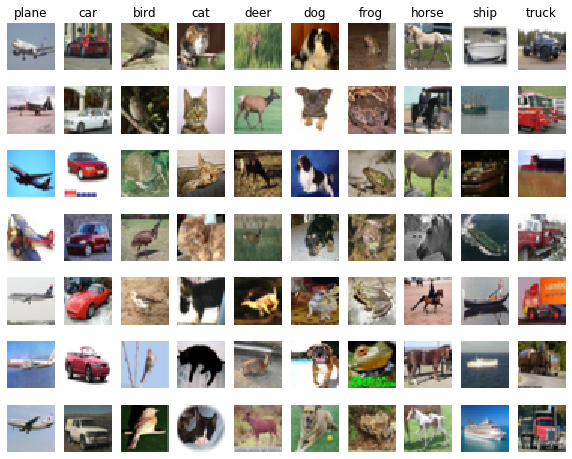

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)

samples_per_class = 7
for y, cls in enumerate(classes, start=0):    # put y=0 & cls= plane in 1st pass, y=1 & cls=car in 2nd pass and so on
    idxs = np.flatnonzero(y_train == y)       # y_train==y creates an array of true/false accourding to matching (i.e. true=1,false=0) then flatnonzero extracts the index of non zero elements in the array
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # choose randomly 7 indexs of any given class e.g=0==plane
    for i, idx in enumerate(idxs,start=0):
        plt_idx = i * num_classes + y + 1   # putting pictures in the propper place 
        plt.subplot(samples_per_class, num_classes, plt_idx)  # make a grid of 7 rows and 10 columns and put this in 1st index
        plt.imshow(X_train[idx].astype('uint8'))  
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))

X_train = X_train[mask]   # select only 5000 train data from 50000 i.e it is extracting each 32*32*3 cube from 0 to 4999
y_train = y_train[mask]   # select only 5000 train lable from 50000 i.e it is extracting each 32*32*3 cube from 0 to 4999
num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]  # similarly selecting only 500 test data 
y_test = y_test[mask]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)    # training data
print('Training labels shape: ', y_train.shape)  # training lables 
print('Test data shape: ', X_test.shape)         # test data
print('Test labels shape: ', y_test.shape)       # test lables



Training data shape:  (5000, 32, 32, 3)
Training labels shape:  (5000,)
Test data shape:  (500, 32, 32, 3)
Test labels shape:  (500,)


In [ ]:
# Reshape the image data into rows i.e. unraveling the 32*32*3 matrix in such a way that we get each entry in the cube are values in column 
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print('New Training data shape:',X_train.shape,'New Test data shape:', X_test.shape)

New Training data shape: (5000, 3072) New Test data shape: (500, 3072)


To make things much structural, we now put everything together into the KNearestNeighbor class. You don't need to implement any fucntion in this class now. Later you will need to come back here and implement the asked function, per the instruction.

In [ ]:
class KNearestNeighbor(object):
  """ a kNN classifier with L2 distance """

  def __init__(self):
    pass

  def train(self, X, y):
    """
    Train the classifier. For k-nearest neighbors this is just 
    memorizing the training data.

    Inputs:
    - X: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y: A numpy array of shape (N,) containing the training labels, where
         y[i] is the label for X[i].
    """
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1, num_loops=0):
    """
    Predict labels for test data using this classifier.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.
    - k: The number of nearest neighbors that vote for the predicted labels.
    - num_loops: Determines which implementation to use to compute distances
      between training points and testing points.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(dists, k=k)

  def compute_distances_two_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a nested loop over both the training data and the 
    test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      for j in range(num_train):

        ########################### CODE ####################################

        euclidean_distance=np.linalg.norm(np.array(X[i])-np.array(self.X_train[j]))
        dists[i][j]=euclidean_distance
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    return dists

  def compute_distances_one_loop(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      #######################################################################
      # TODO:                                                               #
      # Compute the L2 distance between the ith test point and all training #
      # points, and store the result in dists[i, :].                        #
      #######################################################################

      
      dists[i, :] = np.sqrt(np.sum(np.square(self.X_train - X[i]), axis=1))


      #######################################################################
      #                         END OF YOUR CODE                            #
      #######################################################################
    return dists

  def compute_distances_no_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using no explicit loops.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 
    #########################################################################
    # TODO:                                                                 #
    # Compute the l2 distance between all test points and all training      #
    # points without using any explicit loops, and store the result in      #
    # dists.                                                                #
    #                                                                       #
    # You should implement this function using only basic array operations; #
    # in particular you should not use functions from scipy.                #
    #                                                                       #
    # HINT: Try to formulate the l2 distance using matrix multiplication    #
    #       and two broadcast sums.                                         #
    #########################################################################
    sq_sum_test=np.sum(X*X,axis=1) # Test data square and summing each element
    sq_sum_train=np.sum(self.X_train*self.X_train,axis=1) #Train data square and summing each element

    sum_X_Y=sq_sum_test[:, np.newaxis]+sq_sum_train
    product=2*(np.dot(X,np.transpose(self.X_train)))
    dists=np.sqrt(sum_X_Y-product)
       
    #########################################################################
    #                         END OF YOUR CODE                              #
    #########################################################################
    return dists

  def predict_labels(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
      ################################# CODE #################################

      arg_sort=np.argsort(dists[i])  # getting the index of sorted elements
      k_nbrs=arg_sort[:k]  # finding the k nearest neighbours 
      closest_y=self.y_train[k_nbrs]
      #########################################################################
      # TODO:                                                                 #
      # Use the distance matrix to find the k nearest neighbors of the ith    #
      # testing point, and use self.y_train to find the labels of these       #
      # neighbors. Store these labels in closest_y.                           #
      # Hint: Look up the function numpy.argsort.                             #
      #########################################################################
      
      y_pred[i] = np.argmax(np.bincount(closest_y))
      
      #########################################################################
      # TODO:                                                                 #
      # Now that you have found the labels of the k nearest neighbors, you    #
      # need to find the most common label in the list closest_y of labels.   #
      # Store this label in y_pred[i]. Break ties by choosing the smaller     #
      # label.                                                                #
      #########################################################################
      
      #########################################################################
      #                           END OF YOUR CODE                            # 
      #########################################################################

    return y_pred



In [ ]:
# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps: 

1. First we must compute the distances between all test examples and all train examples. 
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

First, open `k_nearest_neighbor.py` and implement the function `compute_distances_two_loops` that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

In [ ]:
# Implement compute_distances_two_loops.

# Test your implementation:

dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)
#print(dists)

(500, 5000)


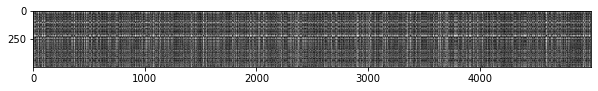

In [ ]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples

plt.imshow(dists, interpolation='none')
plt.show()

**Inline Question #1:** Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme, black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

Answer #1 
1. Each row corresponds to the distance of each "test" data with each of the "training" examples. A bright row could mean that the "test" example is very different form the "training" data. That is, it is something unseen in the "training" dataset as a result it has large distance from all "training" data. It could also mean that the test data is an outlier. 


2. A bright column could indicate that the "test" data in not similar to a particular "training" example.






Second, open k_nearest_neighbor.py and implement the function predict_labels that predicts a label for each test point.

In [ ]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 137 / 500 correct => accuracy: 27.400000


You should expect to see approximately `27%` accuracy. Now lets try out a larger `k`, say `k = 5`:

In [ ]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 139 / 500 correct => accuracy: 27.800000


**Inline Question 2**
We can also try other distance metrics such as L1 distance.
The performance of a Nearest Neighbor classifier that uses L1 distance will not change if (Select all that apply.):
1. The data is preprocessed by subtracting the mean.
2. The data is preprocessed by subtracting the mean and dividing by the standard deviation.
3. The coordinate axes for the data are rotated.
4. None of the above.

*Your Answer*: 1,2

*Your explanation*:  

1.   If x and y are two points and let m be the mean. Then, by subtracting the mean (m) will shift the points x and y in the same direction such that the effective distance between remail the same. That is, ||(x-m)-(y-m)||=||x-m-y+m||=||x-y||. 
2.   By subtracting the mean and dividing by the standard deviation will also result in no change as we are shifting the points in the same direction and dividing by the same amount. We we just get a scaled version. But the distance between the two entities will be preserved. Let sd be the standard deviation then. ||(x-m)/sd -  (y-m)/sd ||=1/sd ||x-y||
3. If we change the co-ordinate axis the data points might get shifted. This could result in a change in the distance between points. This is not the case with L2 distance. That is, changing the axis will not change the distance between the points for euclidean distance.





In [ ]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:

dists_one = classifier.compute_distances_one_loop(X_test)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [ ]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [ ]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

Two loop version took 29.289528 seconds
One loop version took 30.078071 seconds
No loop version took 0.263902 seconds


### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [ ]:
print('Training data shape: ', X_train.shape)    # training data
print('Training labels shape: ', y_train.shape)  # training lables 
print('Test data shape: ', X_test.shape)         # test data
print('Test labels shape: ', y_test.shape)       # test lables


Training data shape:  (5000, 3072)
Training labels shape:  (5000,)
Test data shape:  (500, 3072)
Test labels shape:  (500,)


In [ ]:
num_folds = 5
k_choices = [1, 3, 5, 7, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################

X_train_folds=np.array_split(X_train,num_folds,axis=0)
#print("X_train_folds_length:",X_train_folds, len(X_train_folds))
y_train_folds=np.array_split(y_train,num_folds,axis=0)
#print("y_train_folds_length:",y_train_folds, len(y_train_folds))


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_CV_accuracy = {}


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
cross_validation=KNearestNeighbor()
for k in k_choices:
  k_CV_accuracy[k] = []    

  for fold in range(num_folds):

    #print("The value of k (nearest neighbour) is:",k)
    train_folds=np.delete(np.arange(num_folds),fold)  # the index of the folds that are used to train the algorithm
    test_fold=fold # index of the fold that is used for testing 
    #print("Train folds index:",train_folds)
    #print("Test fold index",test_fold)
          
    # The new training data set 

    X_Cvalidation_train=np.take(X_train_folds,train_folds,axis=0).reshape((4000,X_train.shape[1]))  # train data
    #print("X_Cvalidation_train",X_Cvalidation_train,X_Cvalidation_train.shape)
    y_Cvalidation_train=np.take(y_train_folds,train_folds,axis=0).reshape((4000,))  # train labels
    #print("y_Cvalidation_train",y_Cvalidation_train,y_Cvalidation_train.shape)
    cross_validation.train(X_Cvalidation_train,y_Cvalidation_train)

    # The new test data set

    X_Cvalidation_test=np.take(X_train_folds,fold,axis=0).reshape((1000,X_train.shape[1]))  # test data
    y_Cvalidation_test=np.take(y_train_folds,fold,axis=0).reshape((1000,))   # test labels
    #print("X_Cvalidation_test",X_Cvalidation_test,X_Cvalidation_test.shape)     
    #print(" y_Cvalidation_test", y_Cvalidation_test,y_Cvalidation_test.shape)  
  
    # Computing distances and predicting the results

    dist_Cvalidation=cross_validation.compute_distances_no_loops(X_Cvalidation_test)
    predict_Cvalidation=cross_validation.predict_labels(dist_Cvalidation,k=k)

    # Computing accuracy

    correct_Cvalidation=np.sum(predict_Cvalidation==y_Cvalidation_test)
    accuracy = float(correct_Cvalidation) / 10000

    k_CV_accuracy[k].append(accuracy)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_CV_accuracy):
    for accuracy in k_CV_accuracy[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

  

k = 1, accuracy = 0.026300
k = 1, accuracy = 0.025700
k = 1, accuracy = 0.026400
k = 1, accuracy = 0.027800
k = 1, accuracy = 0.026600
k = 3, accuracy = 0.023900
k = 3, accuracy = 0.024900
k = 3, accuracy = 0.024000
k = 3, accuracy = 0.026600
k = 3, accuracy = 0.025400
k = 5, accuracy = 0.024800
k = 5, accuracy = 0.026600
k = 5, accuracy = 0.028000
k = 5, accuracy = 0.029200
k = 5, accuracy = 0.028000
k = 7, accuracy = 0.026100
k = 7, accuracy = 0.027900
k = 7, accuracy = 0.026800
k = 7, accuracy = 0.028800
k = 7, accuracy = 0.027600
k = 8, accuracy = 0.026200
k = 8, accuracy = 0.028200
k = 8, accuracy = 0.027300
k = 8, accuracy = 0.029000
k = 8, accuracy = 0.027300
k = 10, accuracy = 0.026500
k = 10, accuracy = 0.029600
k = 10, accuracy = 0.027600
k = 10, accuracy = 0.028400
k = 10, accuracy = 0.028000
k = 12, accuracy = 0.026000
k = 12, accuracy = 0.029500
k = 12, accuracy = 0.027900
k = 12, accuracy = 0.028300
k = 12, accuracy = 0.028000
k = 15, accuracy = 0.025200
k = 15, accuracy 

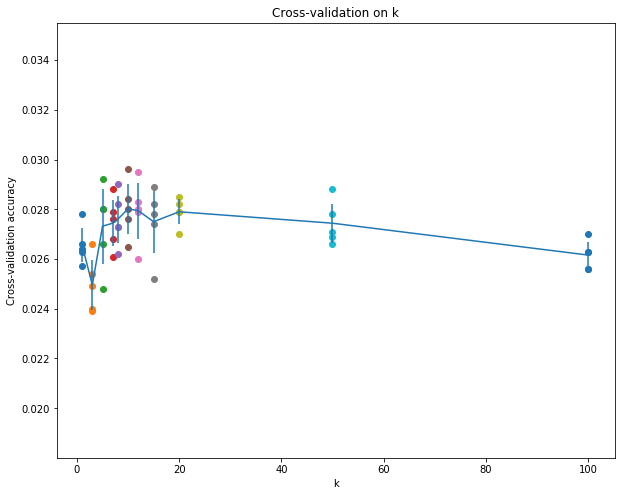

In [ ]:
# plot the raw observations
for k in k_choices:
    accuracies = k_CV_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_CV_accuracy.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_CV_accuracy.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [ ]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 10

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 141 / 500 correct => accuracy: 28.200000


**Inline Question 3**
Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The training error of a 1-NN will always be better than that of 5-NN.
2. The test error of a 1-NN will always be better than that of a 5-NN.
3. The decision boundary of the k-NN classifier is linear.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer*:

*Your explanation*:


1.   True- if training data is fed as test data into the algorithm. The algorithm having seen the data already will choose itself as the the nearest neighbour. As a result the distance will be zero for k=1 as compared to k=5.
2.   False- This cannot be said with 100% certainty. There could be cases where the training error of 1-NN is greater than 5-NN.
3.   False- It is not necessary that the decision boundry is linear. For example if one class is looks like a square and the second class is looks like a triangle. Then there will be two decision boundaries one in shape of a square and the second in shape of a triangle. 
4. True- as we increase the size of the training data the algorithm will calculate the eucledian distance of all the test data to all the training examples. The more the number of training examples the more time it will take to classify and sort the test examples. 


# Section 2. Linear Regression 

The following linear regression assignment is modified from [Stanford CS229](http://cs229.stanford.edu//). Please complete and hand in this completed worksheet.

## Linear regression with one variable

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

The dataset is loaded from the data file into the variables X and y:

In [ ]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'AML/HW1/Coding/'
data_path = prefix + customized_path_to_your_homework + 'data/ex1data1.txt'
data = np.loadtxt(data_path, delimiter=",") # read comma separated data
m = data.shape[0]        # number of training example
X = data[:,0].reshape(m,1)
y = data[:,1].reshape(m,1)   

#print("Data:",data,m)
#print("X:",X)    # data 
#print("y:",y)      # lables
print("Shape of data:",X.shape)
print("Shape od lables:",y.shape)

Shape of data: (97, 1)
Shape od lables: (97, 1)


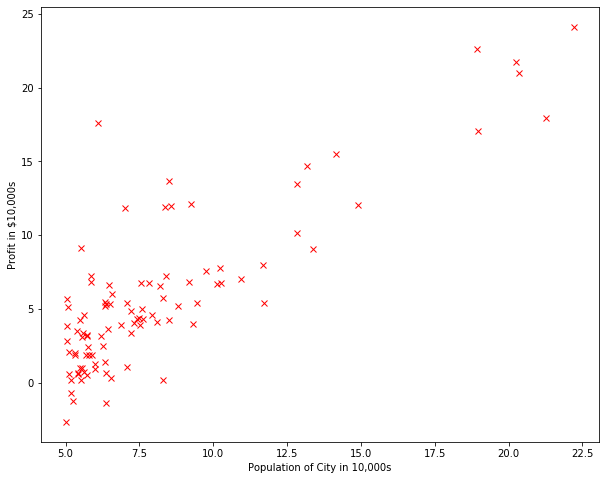

In [ ]:
plt.plot(X,y, 'rx')                         # Plot the data
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In this part, you will fit the linear regression parameters $\theta$ to our dataset
using gradient descent.

The objective of linear regression is to minimize the cost function
\begin{equation*}
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2
\end{equation*}


where the hypothesis $h_\theta(x)$ is given by the linear mode
\begin{equation*}
h_{\theta}(x^{(i)}) = \theta^Tx = \theta_0 + \theta_1 x_1
\end{equation*}


Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update
\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}) x_j^{(i)}
\end{equation*}

With each step of gradient descent, your parameters $\theta_j$ come closer to the
optimal values that will achieve the lowest cost $J(\theta)$.

As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

Your next task is to complete the `compute_cost` function, which is a function that computes J(θ). As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

In [ ]:
def compute_cost(X, y, theta):
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    J = 0;
    #####################################################################
    # Compute the cost of a particular choice of theta                  #
    #               You should set J to the cost.                       #
    #####################################################################
    J=(1/(2*m))*np.sum((np.dot(X,theta)-y)**2)
    #####################################################################
    #                       END OF YOUR CODE                            #
    ####################################################################
    return J

In [ ]:
X = np.concatenate((np.ones((m, 1)), data[:,0].reshape(m,1)), axis=1)
theta = np.zeros((2, 1)) 
print(X.shape,theta.shape)
compute_cost(X, y, theta)

(97, 2) (2, 1)


32.072733877455676

You should expect to see a cost of 32.07.

Next, you will implement gradient descent function. The loop structure has been written for you, and you only need to supply the updates to θ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. The starter code calls `compute_cost` on every iteration and prints the cost. Assuming you have implemented gradient descent and `compute_cost` correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    # theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y)
    J_history = []

    
    for iter in range(num_iters):

        
        #####################################################################
        # Instructions: Perform a single gradient step on the parameter     #
        #               vector theta.                                       #
        #                                                                   #      
        # Hint: While debugging, it can be useful to print out the values   #
        #       of the cost function (compute_cost) and gradient here.       # 
        #####################################################################
        temp0=theta[0]-(alpha/m)*np.sum((np.dot(X,theta)-y))
        temp1=theta[1]-(alpha/m)*np.sum((np.dot(X,theta)-y)*X[:,1].reshape(X.shape[0],1))
                        
        theta[0]=temp0
        theta[1]=temp1



        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    

        # Save the cost J in every iteration 
        J = compute_cost(X, y, theta)
        J_history.append(J)
    
    return theta, J_history

Now let's find the parameter θ and plot the linear fit. 

Running Gradient Descent ...

Theta found by gradient descent: 
[-3.63029144] [1.16636235]


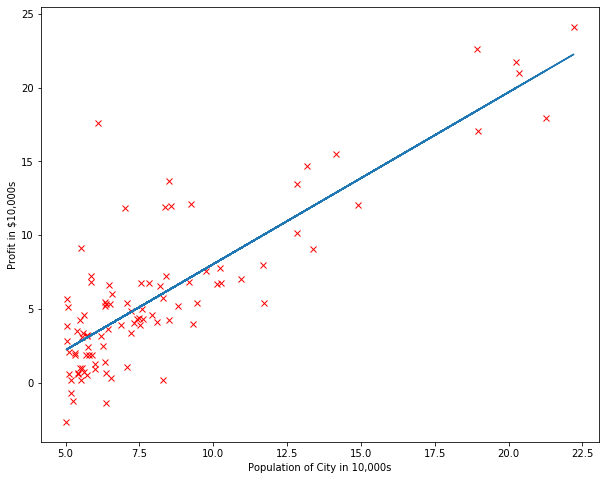

In [ ]:
print('Running Gradient Descent ...\n')

X = np.concatenate((np.ones((m, 1)), data[:,0].reshape(m,1)), axis=1) # Add a column of ones to x
theta = np.zeros((2, 1))                                              # initialize fitting parameters
#print("X:",X)

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# gradient descent
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: ')
print(theta[0], theta[1])


plt.plot(X[:,1], y, 'rx')                         # Plot the data
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.plot(X[:,1], np.dot(X, theta), '-')
plt.show()

## Linear regression with multiple variable

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

In [ ]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'AML/HW1/Coding/'
data_path = prefix + customized_path_to_your_homework + 'data/ex1data2.txt'
data = np.loadtxt(data_path, delimiter=",") # read comma separated data
m = data.shape[0]                                     # number of training example
X = data[:,0:2].reshape(m,2)
y = data[:,2].reshape(m,1)   


print("Data shape:",data.shape)
print("X shape:", X.shape)
print("y shape",  y.shape)

Data shape: (47, 3)
X shape: (47, 2)
y shape (47, 1)


By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [ ]:
def feature_normalize(X):
    
    # FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each
    #   feature is 0 and the standard deviation is 1. This is often a good preprocessing 
    #   step to do when working with learning algorithms.

    # You need to set these values correctly
    mu     = 0      # mean value
    sigma  = 0      # standard deviation

    #####################################################################
    # Instructions: First, for each feature dimension, compute the mean #
    #               of the feature and subtract it from the dataset,    #
    #               storing the mean value in mu. Next, compute the     #
    #               standard deviation of each feature and divide       #
    #               each feature by it's standard deviation, storing    #
    #               the standard deviation in sigma.                    #
    #                                                                   #
    #               Note that X is a matrix where each column is a      #
    #               feature and each row is an example. You need        #
    #               to perform the normalization separately for         #
    #               each feature.                                       #
    #                                                                   #
    # Hint: You might find the 'mean' and 'std' functions useful.       #
    #####################################################################
    
    mu=np.mean(X)
    sigma=np.std(X)

    X_norm=(X-mu)/sigma

    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
        

    return X_norm, mu, sigma

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged.

You should complete the function gradientDescentMulti to implement the gradient descent for linear regression with multiple variables.

Make sure your code supports any number of features and is well-vectorized.

In [ ]:
X = np.concatenate((np.ones((m, 1)),feature_normalize(data[:,0:2].reshape(m,2))[0]), axis=1)
print(X.shape)
theta = np.zeros((3, 1)) 

compute_cost(X, y, theta)

(47, 3)


65591548106.45744

You should expect to see a cost of 65591548106.

Next, you will implement gradient descent function with multiple variable.

In [ ]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y)
    J_history = []

    
    for iter in range(num_iters):

        
        #####################################################################
        # Instructions: Perform a single gradient step on the parameter     #
        #               vector theta.                                       #
        #                                                                   #      
        # Hint: While debugging, it can be useful to print out the values   #
        #       of the cost function (compute_cost) and gradient here.      # 
        #####################################################################
        
        theta=theta-(alpha/m)*np.sum((np.dot(X,theta)-y)*X,axis=0).reshape((theta.shape[0],theta.shape[1]))

        theta=temp
        
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    

        # Save the cost J in every iteration 
        J = compute_cost(X, y, theta)
        print(J)
        #print(theta)
        J_history.append(J)
    
    return theta, J_history

Now let's find the parameter θ and plot the linear fit.

In [ ]:
alpha = 0.01;
num_iters = 400;
n=X.shape[1]
theta = np.zeros((n, 1))
#print(X.shape,theta.shape)
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)


62223785532.307274
59034726299.37105
56014886726.82391
53155286434.36299
50447421631.92048
47883239826.89839
45455115873.6974
43155829294.30339
40978542802.4764
38916781967.66677
36964415958.17245
35115639306.2622
33364954641.02842
31707156337.612072
30137315034.167645
28650762970.516808
27243080104.88359
25910080967.418114
24647802211.40733
23452490825.146217
22320592969.408123
21248743407.313545
20233755495.158443
19272611704.432068
18362454646.833706
17500578575.594177
16684421337.824444
15911556753.955189
15179687401.601519
14486637782.389877
13830347851.42327
13208866890.139389
12620347704.337868
12063041130.119638
11535290831.397614
11035528373.504753
10562268558.247112
10114105006.526783
9689705975.3962
9287810397.102472
8907224128.340652
8546816398.560095
8205516446.760139
7882310336.77188
7576237941.553795
7286390087.531546
7011905850.488419
6751969994.963538
6505810549.541903
6272696510.824339
6051935669.248438
5842872550.293638
5644886464.947145
5457389663.632089
5279825588.

Let's plot the convergence graph

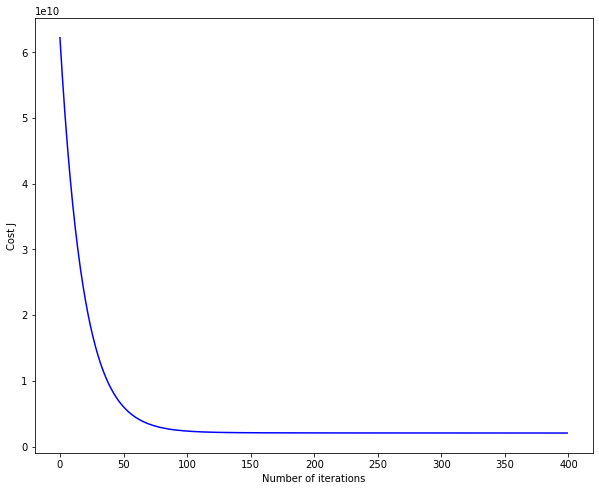

In [ ]:
plt.plot(list(range(0, len(J_history))), J_history, '-b')                         # Plot the data
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()